In [1]:
# Bike Details Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
# 1.What is the range of selling prices in the dataset.


max = df['selling_price'].max()
min = df['selling_price'].min()
max
min
range = max -min
range

755000

In [4]:
# 2.What is the median selling price for bikes in the dataset.?

median = df['selling_price'].median()
median

45000.0

In [5]:
# 3. What is the most common seller type.?
most_common_seller_type = df['seller_type'].value_counts().idxmax()
print(most_common_seller_type)

Individual


In [6]:
# 4.How many bikes have driven more than 50,000 kilometers.?

driven_more_than_50000 = df[df['km_driven'] > 50000]
print(len(driven_more_than_50000))

170


In [7]:
# 5.What is the average km_driven value for each ownership type.?
average_km_driven = df.groupby('owner')['km_driven'].mean()
print(average_km_driven)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [8]:
# 6. What proportion of bikes are from the year 2015 or older.?
bikes_from_2015_or_older = len(df[df['year'] >= 2015]) / len(df)
print(bikes_from_2015_or_older)

0.527803958529689


In [9]:
# 7. What is the trend of missing values across the dataset.?
missing_values_trend = df.isnull().sum() / len(df)
print(missing_values_trend)

name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64


In [10]:
# 8.What is the highest ex_showroom_price recorded, and for which bike.?

highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_ex_showroom_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]
print(highest_ex_showroom_price)

1278000.0


In [11]:
# 9. What is the total number of bikes listed by each seller type.?
total_bikes_by_seller_type = df['seller_type'].value_counts()
print(total_bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


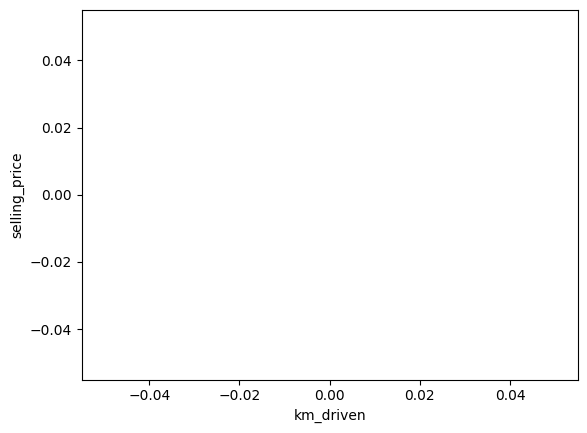

In [12]:
# 10.What is the relationship between selling_price and km_driven for first-owner bikes.?
first_owner_bikes = df[df['owner'] == 'First Owner']
selling_price_vs_km_driven = first_owner_bikes.plot(x='km_driven', y='selling_price', kind='scatter')

In [13]:
# 11.Identify and remove outliers in the km_driven column using the IQR method./
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
Q3-Q1

29500.0

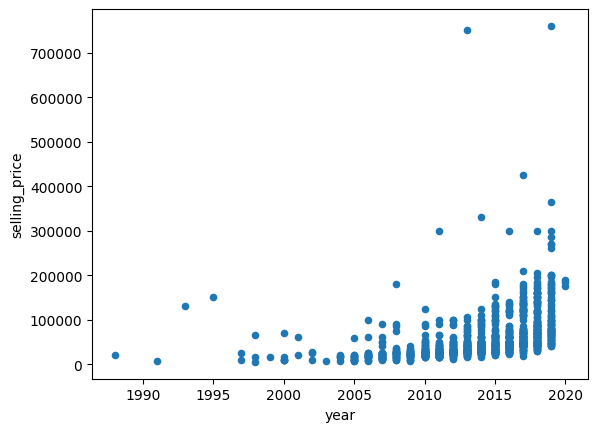

In [14]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.?
year_vs_selling_price = df.plot(x='year', y='selling_price', kind='scatter')



In [15]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
# year).?

df['age'] = df['year'].apply(lambda x: 2023 - x)
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation = df.groupby('age')['depreciation'].mean()
average_depreciation

,depreciation
age,
3,34260.000000
4,-2954.562500
5,-13023.194805
6,-22306.082353
7,-28328.190476
8,-28013.275000
9,-34505.606061
10,-43086.886792
11,-37317.648649


In [16]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year.?

average_price_by_year = df.groupby('year')['selling_price'].mean()
average_price_by_year

,selling_price
year,
1988,20000.000000
1991,6000.000000
1993,130000.000000
1995,150000.000000
1997,17500.000000
1998,28333.333333
1999,15000.000000
2000,20833.333333
2001,40000.000000


<Axes: >

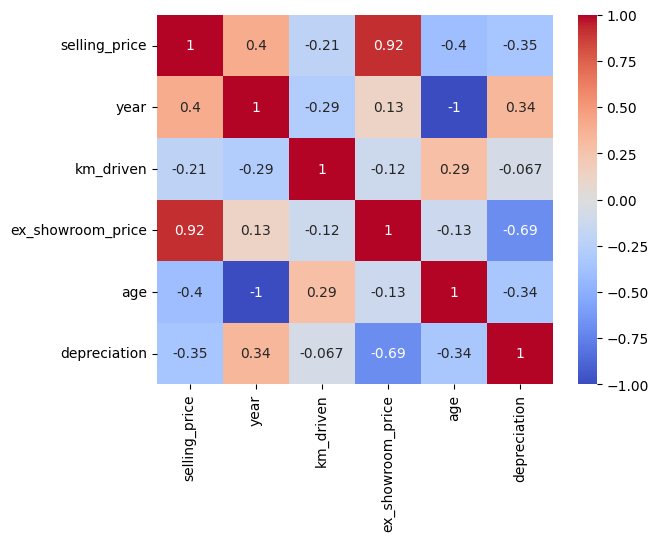

In [18]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.?
import seaborn as sns
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')